# Scraping

In [59]:
import requests
from bs4 import BeautifulSoup
import pandas as pd



In [60]:
#dates of the last 2 years in array

from datetime import datetime, timedelta

#num_of_years = 0.1
num_of_years = 2

def get_saturdays():
    # Get today's date
    end_date = datetime.today()

    # Calculate the start date 10 years ago from today
    start_date = end_date - timedelta(days=365 * num_of_years)

    # List to store the Saturday dates
    saturdays = []

    # Loop through all the dates from start_date to end_date
    current_date = start_date
    while current_date <= end_date:
        # Check if the current date is a Saturday (weekday() returns 5 for Saturday)
        if current_date.weekday() == 5:
            # Format the date as 'yyyy-mm-dd' and add it to the list
            saturdays.append(current_date.strftime('%Y-%m-%d'))

        # Move to the next day
        current_date += timedelta(days=1)

    return saturdays

# Call the function to get the list of Saturday dates
dates = get_saturdays()

# Print the list of Saturday dates
print(dates)

['2021-07-31', '2021-08-07', '2021-08-14', '2021-08-21', '2021-08-28', '2021-09-04', '2021-09-11', '2021-09-18', '2021-09-25', '2021-10-02', '2021-10-09', '2021-10-16', '2021-10-23', '2021-10-30', '2021-11-06', '2021-11-13', '2021-11-20', '2021-11-27', '2021-12-04', '2021-12-11', '2021-12-18', '2021-12-25', '2022-01-01', '2022-01-08', '2022-01-15', '2022-01-22', '2022-01-29', '2022-02-05', '2022-02-12', '2022-02-19', '2022-02-26', '2022-03-05', '2022-03-12', '2022-03-19', '2022-03-26', '2022-04-02', '2022-04-09', '2022-04-16', '2022-04-23', '2022-04-30', '2022-05-07', '2022-05-14', '2022-05-21', '2022-05-28', '2022-06-04', '2022-06-11', '2022-06-18', '2022-06-25', '2022-07-02', '2022-07-09', '2022-07-16', '2022-07-23', '2022-07-30', '2022-08-06', '2022-08-13', '2022-08-20', '2022-08-27', '2022-09-03', '2022-09-10', '2022-09-17', '2022-09-24', '2022-10-01', '2022-10-08', '2022-10-15', '2022-10-22', '2022-10-29', '2022-11-05', '2022-11-12', '2022-11-19', '2022-11-26', '2022-12-03', '2022

In [ ]:
Song = []
Artist = []
Rank = []
Week = []

for date in dates:
    # URL of the Billboard Hot 100 chart
    url = f"https://www.billboard.com/charts/hot-100/{date}/"
    
    # Send a GET request to the URL
    response = requests.get(url)
    
    # Create a BeautifulSoup object to parse the HTML content
    soup = BeautifulSoup(response.content, "html.parser")
    
    #index
    rank=1
    
    # Find all the rows containing song names
    rows = soup.find_all("li", class_="o-chart-results-list__item")
    for row in rows:
        song = row.find("h3", id="title-of-a-story")
        artist = row.find("span", class_="c-label")
        if song and artist:
            song = song.text.strip()
            artist = artist.text.strip()
            Song.append(song)
            Artist.append(artist)
            
            #create index
            Rank.append(rank)
            rank+=1
            
            #create Date
            Week.append(date)

    
    
# Create a dataframe with the song names, writer names, and "Last Week" information
data = {"Song": Song, "Artist": Artist, "Rank": Rank, "Week": Week}
df = pd.DataFrame(data)


In [ ]:
df.to_csv("Billboard_Hot_100.csv")

In [66]:
df

,Song,Artist,Rank,Week
ID,,,,
0,Permission To Dance,BTS,1,7/24/2021
1,Good 4 U,Olivia Rodrigo,2,7/24/2021
2,Stay,The Kid LAROI & Justin Bieber,3,7/24/2021
3,Levitating,Dua Lipa,4,7/24/2021
4,Kiss Me More,Doja Cat Featuring SZA,5,7/24/2021
...,...,...,...,...
10395,Ain't That Some,Morgan Wallen,96,7/15/2023
10396,Lagunas,Peso Pluma & Jasiel Nunez,97,7/15/2023
10397,Dial Drunk,Noah Kahan,98,7/15/2023


# Data Proccesing

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Billboard_Hot_100.csv")
df.set_index('ID',inplace=True)

In [3]:
df['Week'] = pd.to_datetime(df['Week'])

In [4]:
# Group the sorted data by 'Song' and collect the ranks into arrays
song_arrays = {}
for song, group in df.groupby('Song'):
    song_arrays[song] = group['Rank'].values

# Add a new column 'Sequence' to the DataFrame with the arrays of ranks
df['Sequence'] = df['Song'].apply(lambda song: song_arrays[song])

# Create 'data1' by selecting the desired columns and removing duplicates
df = df[['Song', 'Artist', 'Sequence']].drop_duplicates(subset=['Song', 'Artist']).copy()

# Convert the 'Sequence' column to arrays of integers
df['Sequence'] = df['Sequence'].apply(lambda seq: list(map(int, seq)))

# 'data1' now contains the selected columns 'Song', 'Artist', and 'Sequence'
# and it does not have duplicate songs by the same artist.


In [5]:
df 

,Song,Artist,Sequence
ID,,,
0,Permission To Dance,BTS,"[1, 7, 9, 27, 55, 66, 97]"
1,Good 4 U,Olivia Rodrigo,"[2, 2, 3, 2, 2, 3, 3, 4, 15, 7, 6, 7, 6, 6, 7,..."
2,Stay,The Kid LAROI & Justin Bieber,"[3, 4, 4, 1, 1, 1, 1, 2, 6, 1, 1, 2, 1, 2, 2, ..."
3,Levitating,Dua Lipa,"[4, 3, 5, 3, 5, 6, 6, 8, 23, 9, 11, 10, 8, 8, ..."
4,Kiss Me More,Doja Cat Featuring SZA,"[5, 5, 6, 6, 4, 5, 4, 5, 19, 8, 7, 8, 7, 7, 10..."
...,...,...,...
10377,Died And Came Back,Lil Uzi Vert,[78]
10380,Werewolf,Lil Uzi Vert Featuring Bring Me The Horizon,[81]
10391,Zoom,Lil Uzi Vert,[92]


In [6]:
# Assuming you have a DataFrame 'df' with the "ID" column
# and it is already sorted in the order you want to reassign new IDs

# Reset the index of the DataFrame and assign new sequential IDs starting from 0
df.reset_index(drop=True, inplace=True)

# Print the updated DataFrame
df

,Song,Artist,Sequence
0,Permission To Dance,BTS,"[1, 7, 9, 27, 55, 66, 97]"
1,Good 4 U,Olivia Rodrigo,"[2, 2, 3, 2, 2, 3, 3, 4, 15, 7, 6, 7, 6, 6, 7,..."
2,Stay,The Kid LAROI & Justin Bieber,"[3, 4, 4, 1, 1, 1, 1, 2, 6, 1, 1, 2, 1, 2, 2, ..."
3,Levitating,Dua Lipa,"[4, 3, 5, 3, 5, 6, 6, 8, 23, 9, 11, 10, 8, 8, ..."
4,Kiss Me More,Doja Cat Featuring SZA,"[5, 5, 6, 6, 4, 5, 4, 5, 19, 8, 7, 8, 7, 7, 10..."
...,...,...,...
1389,Died And Came Back,Lil Uzi Vert,[78]
1390,Werewolf,Lil Uzi Vert Featuring Bring Me The Horizon,[81]
1391,Zoom,Lil Uzi Vert,[92]
1392,That Fiya,Lil Uzi Vert,[93]


# Sample

In [8]:
'''# Sample data
df = {
    "ID": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36],
    "Song": [
        "Permission To Dance", "Good 4 U", "Stay", "Levitating", "Kiss Me More", "Bad Habits", "Butter",
        "Montero (Call Me By Your Name)", "Save Your Tears", "Deja Vu", "Peaches", "Leave The Door Open",
        "Motley Crew", "Rapstar", "Astronaut In The Ocean", "Whole Lotta Money", "Blinding Lights",
        "Heartbreak Anniversary", "You Right", "Without You", "Fancy Like", "Forever After All",
        "Every Chance I Get", "Famous Friends", "Thot Shit", "Beautiful Mistakes", "Single Saturday Night",
        "Leave Before You Love Me", "Lil Bit", "Blame It On You", "Glad You Exist", "Best Friend",
        "Late At Night", "Ain't Shit", "Heat Waves", "Telepatia", "Wants And Needs",
    ],
    "Artist": [
        "BTS", "Olivia Rodrigo", "The Kid LAROI & Justin Bieber", "Dua Lipa",
        "Doja Cat Featuring SZA", "Ed Sheeran", "BTS", "Lil Nas X", "The Weeknd & Ariana Grande",
        "Olivia Rodrigo", "Justin Bieber Featuring Daniel Caesar & Giveon",
        "Silk Sonic (Bruno Mars & Anderson .Paak)", "Post Malone", "Polo G", "Masked Wolf",
        "BIA Featuring Nicki Minaj", "The Weeknd", "Giveon", "Doja Cat & The Weeknd", "The Kid LAROI",
        "Walker Hayes", "Luke Combs", "DJ Khaled Featuring Lil Baby & Lil Durk",
        "Chris Young + Kane Brown", "Megan Thee Stallion",
        "Maroon 5 Featuring Megan Thee Stallion", "Cole Swindell", "Marshmello X Jonas Brothers",
        "Nelly & Florida Georgia Line", "Jason Aldean", "Dan + Shay", "Saweetie Featuring Doja Cat",
        "Roddy Ricch", "Doja Cat", "Glass Animals", "Kali Uchis", "Drake Featuring Lil Baby"
    ],
    "Sequence": [
        [1, 7, 9, 27, 55, 66, 97], [2, 2, 3, 2, 2, 3, 3, 4, 15, 7, 6, 7, 6, 6, 7, 8, 9, 15, 13, 15, 26, 29, 33, 38, 31, 15, 20, 21, 25, 23, 25, 30, 27, 29, 31, 32, 27, 27, 22, 28, 33, 35, 49],
        [3, 4, 4, 1, 1, 1, 1, 2, 6, 1, 1, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 4, 6, 9, 6, 2, 2, 4, 4, 4, 5, 5, 6, 5, 5, 2, 2, 2, 4, 6, 6, 6, 9, 13, 21, 12, 10, 11, 12, 19, 15, 16, 15, 18, 18, 17, 20, 20, 21, 24, 22, 23, 23],
        [4, 3, 5, 3, 5, 6, 6, 8, 23, 9, 11, 10, 8, 8, 8, 10, 11, 18, 17, 24, 12, 18, 16, 17, 17, 17, 16, 16, 15, 16, 19, 16, 15, 17, 21, 21, 18],
        [5, 5, 6, 6, 4, 5, 4, 5, 19, 8, 7, 8, 7, 7, 10, 12, 15, 20, 21, 25, 34, 36, 42, 38, 19, 35, 29, 35, 35, 44],
        [6, 6, 7, 5, 3, 2, 2, 3, 13, 3, 4, 6, 5, 4, 5, 5, 4, 4, 6, 8, 12, 16, 26, 31, 19, 8, 13, 12, 12, 13, 15, 14, 9, 9, 8, 10, 12, 11, 12, 12, 12, 11, 18, 24, 30, 27, 18, 19, 20, 29, 25, 25, 24, 25],
        [7, 1, 1, 4, 7, 8, 7, 1, 17, 14, 24, 36, 58],
        [8, 8, 8, 8, 9, 10, 9, 15, 30, 13, 9, 13, 17, 20, 24, 24, 27, 42, 48, 41],
        [9, 10, 11, 10, 11, 11, 10, 14, 28, 12, 12, 12, 14, 13, 17, 17, 17, 22, 26, 31, 38, 41, 18, 21, 20, 19, 19, 18, 18, 19, 20, 17, 17, 17, 17, 18, 23, 18, 16],
        [10, 9, 10, 9, 10, 9, 8, 13, 31, 20, 23, 30, 31, 42, 50],
        [11, 11, 12, 13, 12, 14, 18, 31, 47, 40, 36, 41, 39, 41, 83, 56, 62, 82, 99],
        [12, 12, 13, 12, 14, 15, 15, 29, 46, 31, 33, 33, 37, 38, 44, 42, 44, 46, 23, 50, 49],
        [13, 23, 33, 39, 48, 53, 64, 86, 98],
        [14, 13, 16, 19, 25, 28, 40],
        [15, 18, 21, 28, 30, 36, 39],
        [16, 30, 39, 43, 45, 49, 50, 60, 68, 61, 58, 52, 52, 59, 70, 75, 85],
        [17, 17, 17, 16, 18, 21, 20],
        [18, 16, 18, 17, 17, 19, 19, 34],
        [19, 19, 19, 18, 16, 17, 12, 21, 36, 18, 19, 18, 18, 16, 16, 16, 16, 19, 14, 19, 29, 33, 40, 42, 25, 40, 35, 33, 36, 37, 45, 33, 32, 29, 31, 31, 33, 32, 37, 39, 43],
        [20, 20, 20, 22, 28, 32, 37],
        [21, 15, 14, 15, 15, 12, 11, 9, 21, 5, 5, 5, 3, 3, 4, 4, 5, 7, 10, 13, 23, 31, 35, 45, 33, 16, 27, 32, 29, 29, 36, 41, 35, 31, 30, 36, 36, 37, 36, 38, 41, 45],
        [22, 21, 22, 23, 24, 25, 23, 41],
        [23, 22, 23, 21, 23, 24, 25, 49, 64, 60],
        [24, 28, 36, 36, 32, 40, 43],
        [25, 25, 28, 30, 29, 27, 27, 46, 57, 48, 49, 73, 70, 71, 82, 84],
        [26, 29, 27, 34, 36, 41, 47],
        [27, 27, 26, 40, 46, 52, 61, 83, 90, 89],
        [28, 24, 24, 20, 19, 23, 21, 33, 40, 32, 26, 39, 40, 48, 49],
        [29, 26, 25, 26, 27, 39, 46],
        [30, 36, 65, 75, 75, 84],
        [31, 34, 31, 25, 21, 22, 36],
        [32, 40, 40, 38],
        [33, 33, 29, 29, 26, 26, 31, 48, 59, 49, 45, 44, 49, 57, 60],
        [34, 31, 34, 41, 47, 59, 65, 88, 97, 97, 96, 97],
        [35, 32, 30, 31, 31, 34, 33, 23, 33, 15, 16, 15, 15, 12, 14, 13, 10, 10, 8, 7, 8, 9, 8, 15, 7, 3, 3, 3, 3, 3, 4, 2, 2, 1, 1, 1, 1, 1, 2, 3, 3, 3, 5, 7, 12, 6, 5, 6, 6, 10, 9, 8, 7, 8, 10, 12, 14, 13, 17, 19, 18, 17, 17, 19, 20, 21],
        [36, 38, 35, 33, 37],
        [37, 47, 49],
    ]
}

df = pd.DataFrame(df)'''

'# Sample data\ndf = {\n    "ID": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36],\n    "Song": [\n        "Permission To Dance", "Good 4 U", "Stay", "Levitating", "Kiss Me More", "Bad Habits", "Butter",\n        "Montero (Call Me By Your Name)", "Save Your Tears", "Deja Vu", "Peaches", "Leave The Door Open",\n        "Motley Crew", "Rapstar", "Astronaut In The Ocean", "Whole Lotta Money", "Blinding Lights",\n        "Heartbreak Anniversary", "You Right", "Without You", "Fancy Like", "Forever After All",\n        "Every Chance I Get", "Famous Friends", "Thot Shit", "Beautiful Mistakes", "Single Saturday Night",\n        "Leave Before You Love Me", "Lil Bit", "Blame It On You", "Glad You Exist", "Best Friend",\n        "Late At Night", "Ain\'t Shit", "Heat Waves", "Telepatia", "Wants And Needs",\n    ],\n    "Artist": [\n        "BTS", "Olivia Rodrigo", "The Kid LAROI & Justin Bieber", "Dua Lipa",

# Clustering

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as sch

# TF-IDF (Local)

In [44]:

# Assuming "df" is your DataFrame containing the "Sequence" column
sequences = df["Sequence"]

# Convert the arrays (lists) in the "Sequence" column to strings
sequences_as_strings = sequences.apply(lambda arr: ' '.join(map(str, arr)))

# Step 2: Preprocess sequences using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sequences_as_strings)

# Step 3: Perform k-means clustering
# Set the number of clusters (k) based on your requirements
k_values = range(2, 21)  # Trying k values from 2 to 20
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=2023)
    kmeans.fit(tfidf_matrix)
    inertia.append(kmeans.inertia_)

    # Add the cluster labels to the DataFrame
    df[f"Cluster_Labels_{k}"] = kmeans.labels_

# Print cluster information
print("Cluster Information:")
for k in k_values:
    cluster_sizes = np.bincount(df[f"Cluster_Labels_{k}"])
    for i in range(k):
        print(f"Cluster {i + 1} Size (k={k}): {cluster_sizes[i]}")
    print("===")



Cluster Information:
Cluster 1 Size (k=2): 1119
Cluster 2 Size (k=2): 275
===
Cluster 1 Size (k=3): 985
Cluster 2 Size (k=3): 211
Cluster 3 Size (k=3): 198
===
Cluster 1 Size (k=4): 73
Cluster 2 Size (k=4): 219
Cluster 3 Size (k=4): 358
Cluster 4 Size (k=4): 744
===
Cluster 1 Size (k=5): 536
Cluster 2 Size (k=5): 192
Cluster 3 Size (k=5): 241
Cluster 4 Size (k=5): 59
Cluster 5 Size (k=5): 366
===
Cluster 1 Size (k=6): 56
Cluster 2 Size (k=6): 795
Cluster 3 Size (k=6): 210
Cluster 4 Size (k=6): 51
Cluster 5 Size (k=6): 37
Cluster 6 Size (k=6): 245
===
Cluster 1 Size (k=7): 643
Cluster 2 Size (k=7): 196
Cluster 3 Size (k=7): 86
Cluster 4 Size (k=7): 206
Cluster 5 Size (k=7): 77
Cluster 6 Size (k=7): 133
Cluster 7 Size (k=7): 53
===
Cluster 1 Size (k=8): 165
Cluster 2 Size (k=8): 107
Cluster 3 Size (k=8): 509
Cluster 4 Size (k=8): 78
Cluster 5 Size (k=8): 59
Cluster 6 Size (k=8): 103
Cluster 7 Size (k=8): 98
Cluster 8 Size (k=8): 275
===
Cluster 1 Size (k=9): 34
Cluster 2 Size (k=9): 254


In [45]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np

# Assuming "df" is your DataFrame containing the "Sequence" column
sequences = df["Sequence"]

# Convert the arrays (lists) in the "Sequence" column to strings
sequences_as_strings = sequences.apply(lambda arr: ' '.join(map(str, arr)))

# Step 2: Preprocess sequences using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sequences_as_strings)

# Step 3: Perform k-means clustering
# Set the number of clusters (k) based on your requirements
k =10
kmeans = KMeans(n_clusters=k, random_state=2023)
kmeans.fit(tfidf_matrix)

# Step 4: Analyze clustering results
# Add the cluster labels to the DataFrame
df["Cluster_Labels"] = kmeans.labels_

# Get the cluster centers (representative sequences for each cluster)
cluster_centers = kmeans.cluster_centers_

# Get the cluster sizes
cluster_sizes = np.bincount(kmeans.labels_)

# Print cluster information
print("Cluster Information:")
for i in range(k):
    print(f"Cluster {i + 1} Size: {cluster_sizes[i]}")
    print(f"Cluster {i + 1} Center: {cluster_centers[i]}")
    print("===")

# You can also analyze the clusters further based on other columns in the DataFrame if needed.
# For example, you can check the songs and artists in each cluster.
# For instance, to get the songs and artists in Cluster 1:
# cluster_1_songs = df[df['Cluster_Labels'] == 0]['Song']
# cluster_1_artists = df[df['Cluster_Labels'] == 0]['Artist']

Cluster Information:
Cluster 1 Size: 125
Cluster 1 Center: [0.         0.01015044 0.01218182 0.00661709 0.         0.00378934
 0.0101615  0.         0.         0.00963878 0.00480095 0.01248385
 0.00102477 0.00275051 0.01442035 0.         0.010647   0.00581912
 0.00190847 0.00479485 0.01056848 0.01320089 0.01626346 0.00881666
 0.00800524 0.00574894 0.00362214 0.         0.01060231 0.00190264
 0.00190503 0.         0.00774121 0.01574243 0.00557763 0.00765216
 0.01188981 0.00132909 0.         0.0162627  0.00295341 0.
 0.06537353 0.01574529 0.0013446  0.00134066 0.00906524 0.00499232
 0.00708277 0.00441677 0.10895606 0.00817174 0.00609511 0.00590302
 0.00453899 0.00408386 0.00136179 0.00618998 0.10779945 0.01064543
 0.01728563 0.00999604 0.01042158 0.00422406 0.13707803 0.00135795
 0.00995583 0.00912276 0.0034594  0.00464392 0.00096028 0.13321261
 0.02867263 0.01497082 0.         0.00633402 0.01802622 0.21183351
 0.00197925 0.14786857 0.01181368 0.02605031 0.00200148 0.00449565
 0.00513292

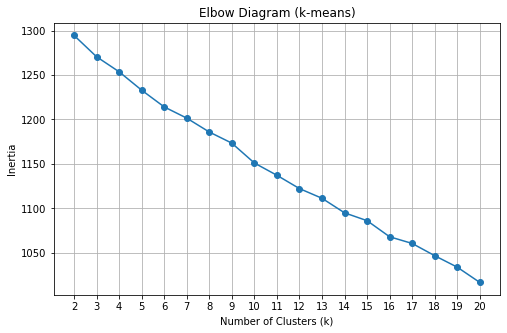

In [46]:
# Plot the Elbow diagram based on inertia
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Diagram (k-means)')
plt.grid(True)
plt.xticks(k_values)
plt.show()

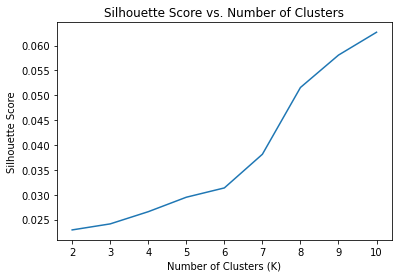

In [47]:
def compute_silhouette_scores(data, max_clusters):
    silhouette_scores = []
    for i in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_scores.append(silhouette_score(data, cluster_labels))

    return silhouette_scores

max_clusters = 10
# Step 4: Calculate the Silhouette Score
silhouette_scores = compute_silhouette_scores(tfidf_matrix, max_clusters)

# Plot the Silhouette Scores
plt.plot(range(2, max_clusters + 1), silhouette_scores)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

Silhouette Score: 0.06440260727434882


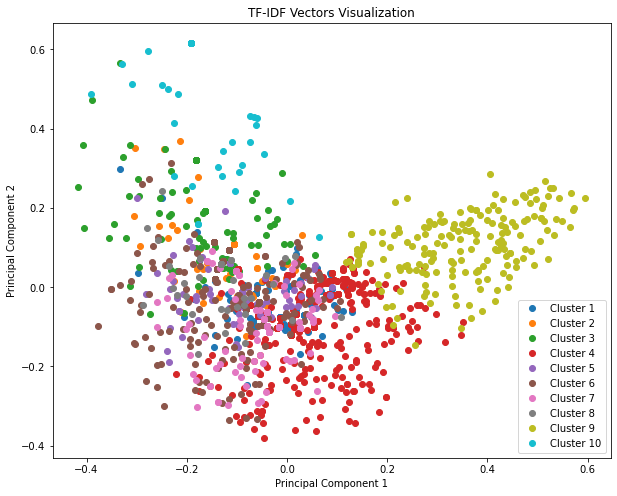

In [50]:


#the "Sequence" column
sequences = df["Sequence"]

# Convert the arrays (lists) in the "Sequence" column to strings
sequences_as_strings = sequences.apply(lambda arr: ' '.join(map(str, arr)))

# Step 2: Preprocess sequences using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sequences_as_strings)

# Step 3: Perform k-means clustering
# Set the number of clusters (k) based on your requirements
k = 10
kmeans = KMeans(n_clusters=k, random_state=2023)
cluster_labels = kmeans.fit_predict(tfidf_matrix)

# Step 4: Apply PCA for dimensionality reduction to 2D
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

# Step 5: Calculate the Silhouette Score
silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)

print("Silhouette Score:", silhouette_avg)

# Step 6: Add the cluster labels and PCA results to the DataFrame
df["Cluster_Labels"] = kmeans.labels_
df["PCA1"] = pca_result[:, 0]
df["PCA2"] = pca_result[:, 1]


# Function to get sequences in a cluster
def get_sequences_in_cluster(cluster_number):
    cluster_sequences = df[df['Cluster_Labels'] == cluster_number]['Sequence'].tolist()
    return cluster_sequences

# Step 7: Plot the clusters in a line chart
plt.figure(figsize=(10, 8))
for i in range(k):
    cluster_sequences = get_sequences_in_cluster(i)
    cluster_label = f"Cluster {i + 1}"
    plt.plot(pca_result[cluster_labels == i, 0], pca_result[cluster_labels == i, 1], 'o', label=cluster_label)

plt.title("TF-IDF Vectors Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

The algorithm works less well because it treats numbers as letters and checks for similarity between all kinds of sequences, it will be able to identify well sequences with the same numbers but those with a small difference that are similar, it will not succeed.

# Smith-Waterman Algorithm (Local)

In [15]:
def smith_waterman(seq1, seq2):
    # Initialize the scoring matrix and the traceback matrix
    m, n = len(seq1), len(seq2)
    score_matrix = np.zeros((m + 1, n + 1), dtype=int)
    traceback_matrix = np.zeros((m + 1, n + 1), dtype=int)

    # Define the scoring system
    match_score = 1
    mismatch_score = -1
    gap_penalty = -1

    # Fill the scoring and traceback matrices
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            match = score_matrix[i - 1, j - 1] + (match_score if seq1[i - 1] == seq2[j - 1] else mismatch_score)
            delete = score_matrix[i - 1, j] + gap_penalty
            insert = score_matrix[i, j - 1] + gap_penalty
            score_matrix[i, j] = max(0, match, delete, insert)
            traceback_matrix[i, j] = np.argmax([0, match, delete, insert])

    # Find the maximum score in the scoring matrix
    max_score = np.max(score_matrix)
    return max_score


In [16]:
def compute_similarity_matrix(data):
    n = len(data)
    similarity_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(i + 1, n):
            score = smith_waterman(data[i], data[j])
            similarity_matrix[i, j] = score
            similarity_matrix[j, i] = score

    return pd.DataFrame(similarity_matrix)


In [17]:
def elbow_method(data, max_clusters):
    wcss = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    plt.plot(range(1, max_clusters + 1), wcss)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.title('Elbow Method')
    plt.show()


In [18]:
def plot_dendrogram(data):
    dendrogram = sch.dendrogram(sch.linkage(data, method='ward'))
    plt.title('Dendrogram')
    plt.xlabel('Data Points')
    plt.ylabel('Euclidean Distance')
    plt.show()


C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


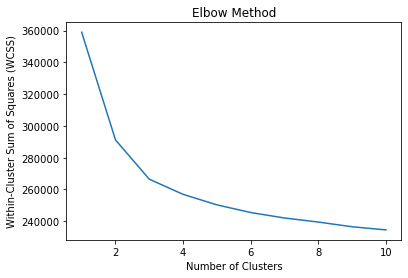

                          Song  Cluster
0          Permission To Dance        2
1                     Good 4 U        2
2                         Stay        2
3                   Levitating        2
4                 Kiss Me More        2
...                        ...      ...
1389        Died And Came Back        1
1390                  Werewolf        1
1391                      Zoom        1
1392                 That Fiya        1
1393  We Didn't Start The Fire        1

[1394 rows x 2 columns]


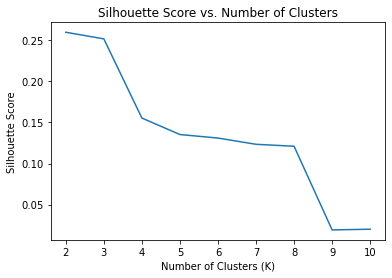

In [19]:


# Step 2: Compute the Pairwise Similarity Matrix
similarity_matrix = compute_similarity_matrix(df["Sequence"])

# Step 3: Use the Elbow Method to Find the Optimal Number of Clusters
elbow_method(similarity_matrix, max_clusters=10)



# Step 5: Apply the Steps and Visualize the Results
# Since the optimal number of clusters from the elbow method is not clear from the elbow plot, 
# you can choose a suitable number of clusters and apply KMeans for clustering.
# For example, let's use 4 clusters:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
df["Cluster"] = kmeans.fit_predict(similarity_matrix)

# Display the DataFrame with cluster assignments
print(df[["Song", "Cluster"]])


def compute_silhouette_scores(data, max_clusters):
    silhouette_scores = []
    for i in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_scores.append(silhouette_score(data, cluster_labels))

    return silhouette_scores

# Compute Silhouette Scores for different values of K (1 to 10)
max_clusters = 10
silhouette_scores = compute_silhouette_scores(similarity_matrix, max_clusters)

# Plot the Silhouette Scores
plt.plot(range(2, max_clusters + 1), silhouette_scores)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()


In [20]:
similarity_matrix = compute_similarity_matrix(df["Sequence"])

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(similarity_matrix)
silhouette_avg = silhouette_score(similarity_matrix, cluster_labels)
print("Silhouette Score with 3 clusters:", silhouette_avg)

Silhouette Score with 3 clusters: 0.2518216449834734


This algorithm is a little better. here we refer to giving the largest 
subsequence and this gives meaning to the cluster according to the sequence 
of numbers and the movement of the ranking.

# Dynamic Time Warping (Global) (hierarchical)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


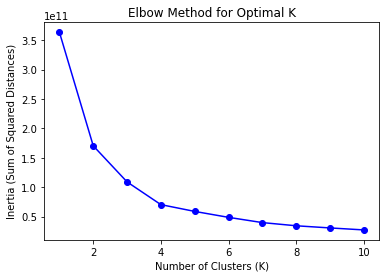

In [86]:
def dynamic_time_warping(seq1, seq2):
    n = len(seq1)
    m = len(seq2)

    # Create a 2D array to store the accumulated distance values
    dp = np.zeros((n + 1, m + 1))

    # Initialize the first row and first column of the dp array
    for i in range(1, n + 1):
        dp[i][0] = float('inf')
    for j in range(1, m + 1):
        dp[0][j] = float('inf')

    # Calculate the accumulated distance values using dynamic programming
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = abs(seq1[i - 1] - seq2[j - 1])
            dp[i][j] = cost + min(dp[i - 1][j], dp[i][j - 1], dp[i - 1][j - 1])

    # Return the DTW distance between the two sequences
    return dp[n][m]

# Given data (df) containing sequences
# Assuming that the "Sequence" column contains the sequences
sequences = df["Sequence"]

# Calculate pairwise DTW distances between all sequences
num_sequences = len(sequences)
dtw_distances = np.zeros((num_sequences, num_sequences))

for i in range(num_sequences):
    for j in range(i, num_sequences):
        distance = dynamic_time_warping(sequences[i], sequences[j])
        dtw_distances[i, j] = distance
        dtw_distances[j, i] = distance

        
# Calculate inertia for different values of K
inertias = []
k_values = range(1, 11)  # Trying K values from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dtw_distances)
    inertias.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal K')
plt.show()        
        
# Set the number of clusters (you can adjust this value)
num_clusters = 4



# Apply K-Means clustering based on DTW distances
kmeans = KMeans(n_clusters=num_clusters, random_state=42,init='random',max_iter=100,n_init=20)
cluster_labels = kmeans.fit_predict(dtw_distances)

# Add cluster labels to the dataframe
df["Cluster"] = cluster_labels

C:\Users\USER\AppData\Local\Temp\ipykernel_13788\3366251148.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendrogram = sch.dendrogram(sch.linkage(data, method='ward'))


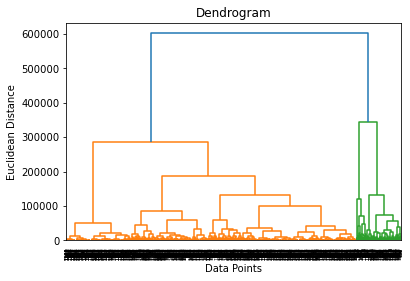

In [87]:
# Step 4: Create a Dendrogram to Visualize the Clustering
plot_dendrogram(dtw_distances)

In [88]:
# Step 5: Analyze clustering results
# Add the cluster labels to the DataFrame
df["Cluster_Labels"] = kmeans.labels_

# Function to get sequences in a cluster
def get_sequences_in_cluster(cluster_number):
    cluster_sequences = df[df['Cluster_Labels'] == cluster_number]['Sequence'].tolist()
    return cluster_sequences

# Display sequences in each cluster
print("Sequences in Each Cluster:")
for i in range(k):
    cluster_sequences = get_sequences_in_cluster(i)
    print(f"Cluster {i + 1}:")
    print(cluster_sequences)
    print("===")

Sequences in Each Cluster:
Cluster 1:
[[2, 2, 3, 2, 2, 3, 3, 4, 15, 7, 6, 7, 6, 6, 7, 8, 9, 15, 13, 15, 26, 29, 33, 38, 31, 15, 20, 21, 25, 23, 25, 30, 27, 29, 31, 32, 27, 27, 22, 28, 33, 35, 49], [3, 4, 4, 1, 1, 1, 1, 2, 6, 1, 1, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 4, 6, 9, 6, 2, 2, 4, 4, 4, 5, 5, 6, 5, 5, 2, 2, 2, 4, 6, 6, 6, 9, 13, 21, 12, 10, 11, 12, 19, 15, 16, 15, 18, 18, 17, 20, 20, 21, 24, 22, 23, 23], [4, 3, 5, 3, 5, 6, 6, 8, 23, 9, 11, 10, 8, 8, 8, 10, 11, 18, 17, 24, 12, 18, 16, 17, 17, 17, 16, 16, 15, 16, 19, 16, 15, 17, 21, 21, 18], [5, 5, 6, 6, 4, 5, 4, 5, 19, 8, 7, 8, 7, 7, 10, 12, 15, 20, 21, 25, 34, 36, 42, 38, 19, 35, 29, 35, 35, 44], [6, 6, 7, 5, 3, 2, 2, 3, 13, 3, 4, 6, 5, 4, 5, 5, 4, 4, 6, 8, 12, 16, 26, 31, 19, 8, 13, 12, 12, 13, 15, 14, 9, 9, 8, 10, 12, 11, 12, 12, 12, 11, 18, 24, 30, 27, 18, 19, 20, 29, 25, 25, 24, 25], [9, 10, 11, 10, 11, 11, 10, 14, 28, 12, 12, 12, 14, 13, 17, 17, 17, 22, 26, 31, 38, 41, 18, 21, 20, 19, 19, 18, 18, 19, 20, 17, 17, 17, 17, 18, 23, 18

In [89]:
# Calculate Silhouette Score for the clustering
silhouette_avg = silhouette_score(dtw_distances, cluster_labels)
print("Silhouette Score with 4 clusters:", silhouette_avg)

Silhouette Score with 4 clusters: 0.4555499414237577


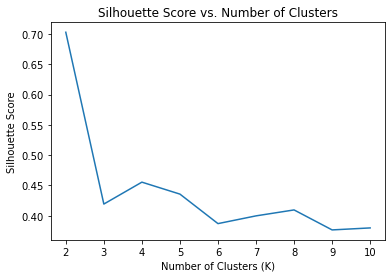

In [90]:
# Compute Silhouette Scores for different values of K (1 to 10)
max_clusters = 10
silhouette_scores = compute_silhouette_scores(dtw_distances, max_clusters)

# Plot the Silhouette Scores
plt.plot(range(2, max_clusters + 1), silhouette_scores)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

This algorithm is very good for our situation because it takes into account both distances and movement,
if we have two sequences that are close in numbers, it will recognize a similarity between them and also
if sequences that are not really close but rise and fall in the same way, it will also give a high similarity to it.

# Our Algorithm

In [60]:
# Function to calculate the average of a list
def calculate_average(lst):
    return sum(lst) / len(lst)

# Function to get the length of a list
def get_list_length(lst):
    return len(lst)


# Apply the function to the 'list_column' and store the results in a new column 'length_column'
df['length_column'] = df['Sequence'].apply(lambda x: get_list_length(x))

# Apply the function to the 'list_column' and store the results in a new column 'average_column'
df['average_column'] = df['Sequence'].apply(lambda x: calculate_average(x))

df['length_avg'] = df['length_column'] / df['average_column']

In [61]:
df[['length_column','average_column']]

,length_column,average_column
0,7,37.428571
1,43,18.395349
2,63,7.920635
3,37,13.081081
4,30,18.200000
...,...,...
1389,1,78.000000
1390,1,81.000000
1391,1,92.000000
1392,1,93.000000


In [77]:
# Create a 2-dimensional array from the two columns 'length' and 'average'
features_array = df[['length_column', 'average_column']].values
silhouette_scores = []


k_values = range(2, 11)  # You can choose different values for k
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_array)
    inertia_values.append(kmeans.inertia_)
    labels = kmeans.fit_predict(features_array)
    silhouette_scores.append(silhouette_score(features_array, labels))
    

k=6    
# Perform K-means clustering with the specific k value
kmeans = KMeans(n_clusters=k,init='k-means++',random_state=42,max_iter=100,n_init=30)
labels = kmeans.fit_predict(features_array)
cluster_centers = kmeans.cluster_centers_



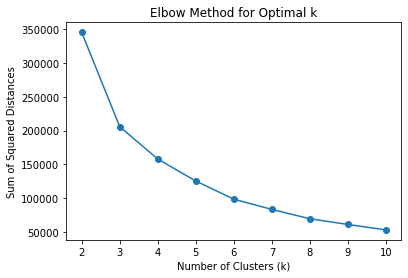

In [78]:
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()


In [79]:
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(features_array)
    silhouette_scores.append(silhouette_score(features_array, labels))


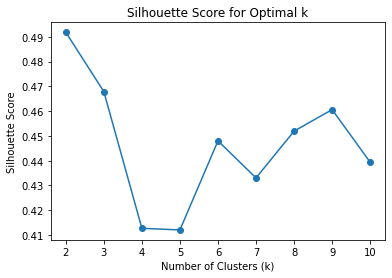

In [80]:
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()


In [81]:
k=6
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(features_array)
silhouette_scores.append(silhouette_score(features_array, labels))


# Calculate the silhouette score
silhouette_avg = silhouette_score(features_array, labels)

print("Silhouette Score with k =", k, "is:", silhouette_avg)

Silhouette Score with k = 6 is: 0.4480017084525638


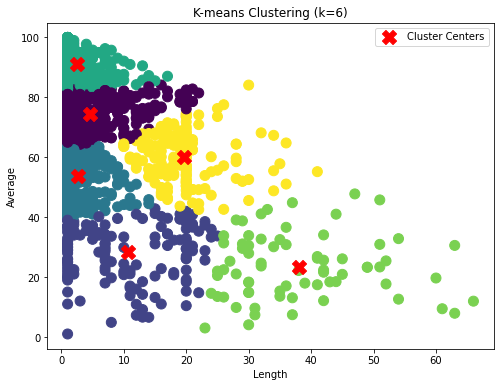

In [82]:
# Specific k value
k = 6


# Separate the cluster centers into x and y coordinates
cluster_centers_x = cluster_centers[:, 0]
cluster_centers_y = cluster_centers[:, 1]

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['length_column'], df['average_column'], c=labels, cmap='viridis', s=100)
plt.scatter(cluster_centers_x, cluster_centers_y, c='red', marker='X', s=200, label='Cluster Centers')
plt.xlabel('Length')
plt.ylabel('Average')
plt.title(f'K-means Clustering (k={k})')
plt.legend()
plt.show()


# Grid Search

In [41]:
#tf-idf
random_states = [42, 100, 2023]

# Store the results
grid_search_results = []

# Perform grid search
for k in k_values:
    for random_state in random_states:
        kmeans = KMeans(n_clusters=k, random_state=random_state)
        kmeans.fit(tfidf_matrix)
        inertia = kmeans.inertia_
        cluster_labels = kmeans.labels_
        grid_search_results.append((k, random_state, inertia, cluster_labels))

# Find the best hyperparameters based on inertia
best_params = min(grid_search_results, key=lambda x: x[2])
best_k, best_random_state, best_inertia, best_cluster_labels = best_params

# Add the best cluster labels to the DataFrame
df["Best_Cluster_Labels"] = best_cluster_labels

# Print cluster information for the best hyperparameters
print("Best Hyperparameters:")
print(f"Number of Clusters (k): {best_k}")
print(f"Random State: {best_random_state}")
print(f"Best Inertia: {best_inertia}")

cluster_sizes = np.bincount(best_cluster_labels)
for i in range(best_k):
    print(f"Cluster {i + 1} Size: {cluster_sizes[i]}")

Best Hyperparameters:
Number of Clusters (k): 10
Random State: 2023
Best Inertia: 1151.0904249623168
Cluster 1 Size: 125
Cluster 2 Size: 47
Cluster 3 Size: 95
Cluster 4 Size: 395
Cluster 5 Size: 92
Cluster 6 Size: 239
Cluster 7 Size: 122
Cluster 8 Size: 43
Cluster 9 Size: 191
Cluster 10 Size: 45


In [72]:
# Our Algorithm
from sklearn.model_selection import GridSearchCV
param_grid = {
    'init': ['k-means++', 'random'],  # Method for initialization
    'n_init': [10, 20, 30],  # Number of times the k-means algorithm will be run with different centroid seeds
    'max_iter': [100, 300, 500]  # Maximum number of iterations of the k-means algorithm for a single run
}

# Create the KMeans instance with fixed k value
kmeans = KMeans(n_clusters=k, random_state=42)

# Create the GridSearchCV instance
grid_search = GridSearchCV(kmeans, param_grid, n_jobs=-1, verbose=1)

# Perform grid search on the data
grid_search.fit(features_array)

# Retrieve the best hyperparameters and the best KMeans instance
best_params = grid_search.best_params_
best_kmeans = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

# Accessing the cluster labels and centers of the best KMeans instance
labels = best_kmeans.fit_predict(features_array)
cluster_centers = best_kmeans.cluster_centers_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Hyperparameters:
init: k-means++
max_iter: 100
n_init: 30


In [84]:
# Apply K-Means clustering based on DTW distances
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(dtw_distances)


# Our Algorithm
from sklearn.model_selection import GridSearchCV
param_grid = {
    'init': ['k-means++', 'random'],  # Method for initialization
    'n_init': [10, 20, 30],  # Number of times the k-means algorithm will be run with different centroid seeds
    'max_iter': [100, 300, 500]  # Maximum number of iterations of the k-means algorithm for a single run
}



# Create the GridSearchCV instance
grid_search = GridSearchCV(kmeans, param_grid, n_jobs=-1, verbose=1)

# Perform grid search on the data
grid_search.fit(features_array)

# Retrieve the best hyperparameters and the best KMeans instance
best_params = grid_search.best_params_
best_kmeans = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

# Accessing the cluster labels and centers of the best KMeans instance
labels = best_kmeans.fit_predict(features_array)
cluster_centers = best_kmeans.cluster_centers_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Hyperparameters:
init: random
max_iter: 100
n_init: 20


# Bayesian optimization

In [94]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import optuna

# Function to calculate the average of a list
def calculate_average(lst):
    return sum(lst) / len(lst)

# Function to get the length of a list
def get_list_length(lst):
    return len(lst)

# Apply the function to the 'list_column' and store the results in a new column 'length_column'
df['length_column'] = df['Sequence'].apply(lambda x: get_list_length(x))

# Apply the function to the 'list_column' and store the results in a new column 'average_column'
df['average_column'] = df['Sequence'].apply(lambda x: calculate_average(x))

df['length_avg'] = df['length_column'] / df['average_column']
# Create a 2-dimensional array from the two columns 'length' and 'average'
features_array = df[['length_column', 'average_column']].values

# Step 3: Define the objective function to optimize (silhouette score) for K-Means clustering using optuna
def kmeans_objective(trial):
    k = trial.suggest_int('k', 2, 10)
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(features_array)
    silhouette_avg = silhouette_score(features_array, labels)
    return silhouette_avg

# Step 4: Perform Bayesian optimization using optuna
study = optuna.create_study(direction='maximize')
study.optimize(kmeans_objective, n_trials=20)

# Get the best hyperparameters
best_k = study.best_params['k']
best_silhouette_score = study.best_value

print("Best number of clusters (K):", best_k)
print("Best Silhouette Score:", best_silhouette_score)

[I 2023-07-26 20:30:20,059] A new study created in memory with name: no-name-3ef99f37-6776-40e1-ade2-325b2ed295ae
[I 2023-07-26 20:30:20,207] Trial 0 finished with value: 0.4678805354865238 and parameters: {'k': 3}. Best is trial 0 with value: 0.4678805354865238.
[I 2023-07-26 20:30:20,458] Trial 1 finished with value: 0.4519214573858365 and parameters: {'k': 8}. Best is trial 0 with value: 0.4678805354865238.
[I 2023-07-26 20:30:20,659] Trial 2 finished with value: 0.4678805354865238 and parameters: {'k': 3}. Best is trial 0 with value: 0.4678805354865238.
[I 2023-07-26 20:30:20,893] Trial 3 finished with value: 0.4393939674704372 and parameters: {'k': 10}. Best is trial 0 with value: 0.4678805354865238.
[I 2023-07-26 20:30:21,171] Trial 4 finished with value: 0.4480017084525638 and parameters: {'k': 6}. Best is trial 0 with value: 0.4678805354865238.
[I 2023-07-26 20:30:21,331] Trial 5 finished with value: 0.41269988781669037 and parameters: {'k': 4}. Best is trial 0 with value: 0.46

Best number of clusters (K): 2
Best Silhouette Score: 0.4918515187573582


In [95]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
import optuna

# Assuming "df" is your DataFrame containing the "Sequence" column
sequences = df["Sequence"]

# Convert the arrays (lists) in the "Sequence" column to strings
sequences_as_strings = sequences.apply(lambda arr: ' '.join(map(str, arr)))

# Step 2: Preprocess sequences using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sequences_as_strings)

# Step 3: Define the objective function to optimize (inertia) for K-Means clustering using optuna
def kmeans_objective(trial):
    n_clusters = trial.suggest_int('n_clusters', 2, 20)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)
    return -kmeans.inertia_  # Negative sign because optuna maximizes the objective

# Step 4: Perform Bayesian optimization using optuna
study = optuna.create_study(direction='maximize')
study.optimize(kmeans_objective, n_trials=20)

# Get the best hyperparameters
best_n_clusters = study.best_params['n_clusters']
best_inertia = -study.best_value

print("Best number of clusters (K):", best_n_clusters)
print("Best Inertia:", best_inertia)


[I 2023-07-26 20:30:30,079] A new study created in memory with name: no-name-38851adb-3d6b-4d82-b996-b9e8a943dd0a
[I 2023-07-26 20:30:31,002] Trial 0 finished with value: -1272.555712461905 and parameters: {'n_clusters': 3}. Best is trial 0 with value: -1272.555712461905.
[I 2023-07-26 20:30:32,903] Trial 1 finished with value: -1154.9053677302054 and parameters: {'n_clusters': 10}. Best is trial 1 with value: -1154.9053677302054.
[I 2023-07-26 20:30:34,654] Trial 2 finished with value: -1205.1361206695235 and parameters: {'n_clusters': 7}. Best is trial 1 with value: -1154.9053677302054.
[I 2023-07-26 20:30:37,402] Trial 3 finished with value: -1040.0797841557526 and parameters: {'n_clusters': 18}. Best is trial 3 with value: -1040.0797841557526.
[I 2023-07-26 20:30:39,744] Trial 4 finished with value: -1110.1972652327838 and parameters: {'n_clusters': 13}. Best is trial 3 with value: -1040.0797841557526.
[I 2023-07-26 20:30:41,186] Trial 5 finished with value: -1238.9674005939046 and

Best number of clusters (K): 20
Best Inertia: 1011.3805713576578
